# Regression With an Insurance Dataset

## Table of Contents

1. [**Introduction**](#1)
    - Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#2)
	- Importing Libraries and Notebook Setup
    - Loading Data
    - Basic Data Exploration
    - Areas to Fix
3. [**Data Proprocessing**](#3)
4. [**Data Analysis**](#4)
5. [**Conclusion**](#5)
    - Insights
    - Suggestions
    - Possible Next Steps
6. [**Epilogue**](#6) 
    - References
    - Versioning

---

# 1 Introduction


### Project Description

**Goal/Purpose:** 

This dataset is from the Kaggle competition 'Regression with an Insurance Dataset'. The goal of this competition is to build a model to predict insurance Premiums based on various factors.

<p>&nbsp;</p>

### Data Description

**Content:** 


This dataset is a csv file of 1200000 records. It contains information about insurance policyholders, which can be used to analyze factors influencing insurance premiums. The data includes various attributes such as  This information can be valuable for insurance companies to understand risk profiles, develop personalized pricing strategies, and improve customer segmentation.

<p>&nbsp;</p>

**Description of Attributes:** 

Here you can describe what each column represents.
| Column   | Description                                            |
| -------- | ------------------------------------------------------ |
|id	| Unique identifier for each policyholder  |
|Age	| Age of the policyholder |
|Gender	| Gender of the policyholder |
|Annual Income |	Annual income of the policyholder |
|Marital Status |	Marital status of the policyholder |
|Number of Dependents |	Number of dependents of the policyholder |
|Education Level |	Education level of the policyholder |
|Occupation |	Occupation of the policyholder|
|Health Score |	Health score of the policyholder |
|Location  |	Location of the policyholder |
|Policy Type |	Type of insurance policy |
|Previous Claims |	Number of previous claims made by the policyholder |
|Vehicle Age |	Age of the vehicle |
|Credit Score |	Credit score of the policyholder |
|Insurance Duration |	Duration of the insurance policy |
|Policy Start Date |	Start date of the insurance policy |
|Customer Feedback |	Customer feedback on the insurance company |
|Smoking Status |	whether the policyholder smokes or not |
|Exercise Frequency |	Frequency of exercise of the policyholder |
|Property Type |	Type of property owned by the policyholder |
|Premium Amount |	Amount of the insurance premium |

<p>&nbsp;</p>

**Acknowledgements:** 

This dataset is provided by Kaggle and the original source can be found on [kaggle](https://www.kaggle.com/competitions/playground-series-s4e12).

---

# 2

## Acquiring and Loading Data
the data was acquired via manual download from the kaggle link provided above
### Importing Libraries and Notebook Setup

In [ ]:
# Data manipulation
import datetime
import numpy as np
import pandas as pd
import pandas.api.types as ptypes
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pandas settings
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 60
pd.options.display.float_format = '{:,.3f}'.format

# Visualization settings
from matplotlib import rcParams
rcParams['font.size'] = 12
%matplotlib inline


### Loading Data

In [3]:
# # Load DataFrame
df = pd.read_csv('data/raw/train.csv', parse_dates=['Policy Start Date'])

### Basic Data Exploration

In [4]:
# # Show rows and columns count
print(f"Rows count: {df.shape[0]}\nColumns count: {df.shape[1]}")

Rows count: 1200000
Columns count: 21


In [5]:
df.head(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.000,Female,"10,049.000",Married,1.000,Bachelor's,Self-Employed,22.599,Urban,Premium,2.000,17.000,372.000,5.000,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,"2,869.000"
1,1,39.000,Female,"31,678.000",Divorced,3.000,Master's,NaN,15.570,Rural,Comprehensive,1.000,12.000,694.000,2.000,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,"1,483.000"
2,2,23.000,Male,"25,602.000",Divorced,3.000,High School,Self-Employed,47.178,Suburban,Premium,1.000,14.000,NaN,3.000,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.000
3,3,21.000,Male,"141,855.000",Married,2.000,Bachelor's,NaN,10.938,Rural,Basic,1.000,0.000,367.000,1.000,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.000
4,4,21.000,Male,"39,651.000",Single,1.000,Bachelor's,Self-Employed,20.376,Rural,Premium,0.000,8.000,598.000,4.000,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,"2,022.000"
5,5,29.000,Male,"45,963.000",Married,1.000,Bachelor's,NaN,33.053,Urban,Premium,2.000,4.000,614.000,5.000,2022-05-20 15:21:39.207847,Average,No,Weekly,House,"3,202.000"
6,6,41.000,Male,"40,336.000",Married,0.000,PhD,NaN,NaN,Rural,Basic,2.000,8.000,807.000,6.000,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.000
7,7,48.000,Female,"127,237.000",Divorced,2.000,High School,Employed,5.770,Suburban,Comprehensive,1.000,11.000,398.000,5.000,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.000
8,8,21.000,Male,"1,733.000",Divorced,3.000,Bachelor's,NaN,17.870,Urban,Premium,1.000,10.000,685.000,8.000,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.000
9,9,44.000,Male,"52,447.000",Married,2.000,Master's,Employed,20.474,Urban,Comprehensive,1.000,9.000,635.000,3.000,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo,64.000


In [6]:
df.tail(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
1199990,1199990,55.000,Female,"72,384.000",Single,0.000,High School,Unemployed,13.662,Urban,Basic,1.000,3.000,789.000,5.000,2020-01-10 15:21:39.155231,Average,Yes,Monthly,Apartment,231.000
1199991,1199991,59.000,Female,"23,706.000",Divorced,4.000,High School,Self-Employed,24.913,Suburban,Comprehensive,NaN,17.000,NaN,1.000,2021-06-22 15:21:39.188220,Good,Yes,Monthly,Apartment,"3,381.000"
1199992,1199992,53.000,Female,"6,837.000",Married,2.000,High School,Self-Employed,17.844,Urban,Comprehensive,NaN,15.000,406.000,4.000,2021-01-09 15:21:39.281787,Good,No,Rarely,House,"1,251.000"
1199993,1199993,38.000,Male,"1,607.000",Married,1.000,High School,NaN,18.552,Suburban,Comprehensive,0.000,12.000,469.000,2.000,2022-08-10 15:21:39.132191,Good,No,Rarely,House,"1,027.000"
1199994,1199994,34.000,Male,"23,456.000",Single,4.000,Master's,Self-Employed,14.783,Rural,Basic,NaN,12.000,548.000,9.000,2023-06-09 15:21:39.134960,Good,No,Monthly,Apartment,"1,584.000"
1199995,1199995,36.000,Female,"27,316.000",Married,0.000,Master's,Unemployed,13.773,Urban,Premium,NaN,5.000,372.000,3.000,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,"1,303.000"
1199996,1199996,54.000,Male,"35,786.000",Divorced,NaN,Master's,Self-Employed,11.483,Rural,Comprehensive,NaN,10.000,597.000,4.000,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.000
1199997,1199997,19.000,Male,"51,884.000",Divorced,0.000,Master's,NaN,14.724,Suburban,Basic,0.000,19.000,NaN,6.000,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.000
1199998,1199998,55.000,Male,NaN,Single,1.000,PhD,NaN,18.547,Suburban,Premium,1.000,7.000,407.000,4.000,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.000
1199999,1199999,21.000,Female,NaN,Divorced,0.000,PhD,NaN,10.125,Rural,Premium,0.000,18.000,502.000,6.000,2020-08-26 15:21:39.155231,Good,Yes,Monthly,House,"2,480.000"


#### Checking Data Types
we need to check the data types for the columns to see what needs to be fixed

In [7]:
# # Show data types
df.dtypes

id                               int64
Age                            float64
Gender                          object
Annual Income                  float64
Marital Status                  object
Number of Dependents           float64
Education Level                 object
Occupation                      object
Health Score                   float64
Location                        object
Policy Type                     object
Previous Claims                float64
Vehicle Age                    float64
Credit Score                   float64
Insurance Duration             float64
Policy Start Date       datetime64[ns]
Customer Feedback               object
Smoking Status                  object
Exercise Frequency              object
Property Type                   object
Premium Amount                 float64
dtype: object

- `age`, `Number of Dependents`, `Previous Claims`, `Vehicle Age` should be **integer**.
- `Gender` and `Marital Status`. `Education Level`, `Policy Type`, `Customer Feedback`, `Smoking Status`, `Exercise Frequency`, `Property Type` should be **category**.
- `Occupation`, `Location` might be better as a **category**.


#### Check Missing Data

In [8]:
df.isna().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

we have a lot of missing data especially in the `Occupation` and `Previous Claims` columns.

#### Check for Duplicate Rows

In [9]:
df.duplicated().sum()

np.int64(0)

Checking the number of duplicates via the id column.

In [10]:
df.duplicated(subset=['id']).sum()

np.int64(0)

We have no duplicated records in the dataset

#### Check Uniqueness of Data

In [11]:
print(f"Occuopation unique values: {df['Occupation'].nunique()}")
print(f"Location unique values: {df['Location'].nunique()}")
print(f"Credit Score unique values: {df['Credit Score'].nunique()}")
print(f"Customer Feedback unique values: {df['Customer Feedback'].nunique()}")
print("insurance duration unique values: ", df['Insurance Duration'].nunique())

Occuopation unique values: 3
Location unique values: 3
Credit Score unique values: 550
Customer Feedback unique values: 3
insurance duration unique values:  9


From these results `Occupation`, `Location`, `Customer Feedback`, `Insurance Duration` should be converted to **category**

#### Check Data Range

In [12]:
# # Print summary statistics
df.describe()


,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Premium Amount
count,"1,200,000.000","1,181,295.000","1,155,051.000","1,090,328.000","1,125,924.000","835,971.000","1,199,994.000","1,062,118.000","1,199,999.000",1200000,"1,200,000.000"
mean,"599,999.500",41.146,"32,745.218",2.010,25.614,1.003,9.570,592.924,5.018,2022-02-13 05:06:30.972380672,"1,102.545"
min,0.000,18.000,1.000,0.000,2.012,0.000,0.000,300.000,1.000,2019-08-17 15:21:39.080371,20.000
25%,"299,999.750",30.000,"8,001.000",1.000,15.919,0.000,5.000,468.000,3.000,2020-11-20 15:21:39.121168896,514.000
50%,"599,999.500",41.000,"23,911.000",2.000,24.579,1.000,10.000,595.000,5.000,2022-02-14 15:21:39.151731968,872.000
75%,"899,999.250",53.000,"44,634.000",3.000,34.527,2.000,15.000,721.000,7.000,2023-05-06 15:21:39.182597120,"1,509.000"
max,"1,199,999.000",64.000,"149,997.000",4.000,58.976,9.000,19.000,849.000,9.000,2024-08-15 15:21:39.287115,"4,999.000"
std,"346,410.306",13.540,"32,179.506",1.417,12.203,0.983,5.776,149.982,2.594,NaN,864.999


---

The data description shows no unexpected outliers or invalid data

# 3

## Data Preprocessing

First step of the preprocessing is to create a copy of the df to preserve the original data.

In [13]:
df_clean = df.copy()

Here you can add sections like:

- Renaming columns
- Drop Redundant Columns
- Changing Data Types
- Dropping Duplicates
- Handling Missing Values
- Handling Unreasonable Data Ranges
- Feature Engineering / Transformation

Use `assert` where possible to show that preprocessing is done.

### Rename Columns

In [14]:
def clean_columns_names(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

In [15]:
# # Rename columns to snake_case
df_clean = clean_columns_names(df_clean)

In [16]:
# # Verify columns are renamed
df_clean.columns

Index(['id', 'age', 'gender', 'annual_income', 'marital_status',
       'number_of_dependents', 'education_level', 'occupation', 'health_score',
       'location', 'policy_type', 'previous_claims', 'vehicle_age',
       'credit_score', 'insurance_duration', 'policy_start_date',
       'customer_feedback', 'smoking_status', 'exercise_frequency',
       'property_type', 'premium_amount'],
      dtype='object')

### Drop Redundant Columns

There are no redundant columns in the dataset

### Handle Missing Values

First, we need to handle the columns that have a large number of missing values which are `Occupation` and `Previous Claims`. the best way is to drop the Occupation column as it can't be predicted. And filling `Previous Claims` missing values with 0.

In [17]:
#dropping the occupation column
df_clean.drop(columns=['occupation'], inplace=True, axis=1)
assert 'occupation' not in df_clean.columns

In [18]:
#filling the missing values in the previous claims column with 0
df_clean['previous_claims'] =  df_clean['previous_claims'].fillna(0)
assert df_clean['previous_claims'].isna().sum() == 0

Now that we dealt with the columns that had huge numbers. We can drop the remaining null values.

In [19]:
#dropping the null values in the dataset
df_clean = df_clean.dropna()
assert df_clean.isna().sum().sum() == 0

##### now we have no missing values

### Changing Data Types

First in the conversion are the columns that need to be changed to int

In [20]:
#convert the data type of the columns to integer
df_clean['age'] = df_clean['age'].astype(int)
df_clean['number_of_dependents'] = df_clean['number_of_dependents'].astype(int)
df_clean['credit_score'] = df_clean['credit_score'].astype(int)
df_clean['previous_claims'] = df_clean['previous_claims'].astype(int)
df_clean['insurance_duration'] = df_clean['insurance_duration'].astype(int)
df_clean['vehicle_age'] = df_clean['vehicle_age'].astype(int)

assert df_clean['age'].dtype == 'int64'
assert df_clean['number_of_dependents'].dtype == 'int64'
assert df_clean['credit_score'].dtype == 'int64'
assert df_clean['previous_claims'].dtype == 'int64'
assert df_clean['insurance_duration'].dtype == 'int64'
assert df_clean['vehicle_age'].dtype == 'int64'

Now, converting the columns that need to be converted to category type

In [21]:
#converting columns to categorical
df_clean['gender'] = df_clean['gender'].astype('category')
df_clean['marital_status'] = df_clean['marital_status'].astype('category')
df_clean['education_level'] = df_clean['education_level'].astype('category')
df_clean['policy_type'] = df_clean['policy_type'].astype('category')
df_clean['customer_feedback'] = df_clean['customer_feedback'].astype('category')
df_clean['smoking_status'] = df_clean['smoking_status'].astype('category')
df_clean['exercise_frequency'] = df_clean['exercise_frequency'].astype('category')
df_clean['property_type'] = df_clean['property_type'].astype('category')
df_clean['location'] = df_clean['location'].astype('category')

In [96]:
#asserting the data types
assert df_clean['gender'].dtype == 'category'
assert df_clean['marital_status'].dtype == 'category'
assert df_clean['education_level'].dtype == 'category'
assert df_clean['policy_type'].dtype == 'category'
assert df_clean['customer_feedback'].dtype == 'category'
assert df_clean['smoking_status'].dtype == 'category'
assert df_clean['exercise_frequency'].dtype == 'category'
assert df_clean['property_type'].dtype == 'category'
assert df_clean['location'].dtype == 'category'

### Dropping Duplicates

##### there are no duplicates in the dataset

### Handling Unreasonable Data Ranges

##### there are no unreasonable data ranges in the dataset

### Storing the clean data

In [23]:
df_clean.to_csv('data/clean/train_cleaned.csv', index=False)

---

In [ ]:
# # Verify columns are renamed
df_clean.columns

Index(['id', 'age', 'gender', 'annual_income', 'marital_status',
       'number_of_dependents', 'education_level', 'occupation', 'health_score',
       'location', 'policy_type', 'previous_claims', 'vehicle_age',
       'credit_score', 'insurance_duration', 'policy_start_date',
       'customer_feedback', 'smoking_status', 'exercise_frequency',
       'property_type', 'premium_amount'],
      dtype='object')

# 4

# Data Analysis

Here is where your analysis begins. You can add different sections based on your project goals.

In [24]:
#creating a sample for analysis
random_state = 42
df_sample = df_clean.sample(frac=0.1, random_state=random_state)

## **4.1** Univariate Exploration

### **4.1.1** exploring `premium_amount` distribution
we need to look at the distribution of `premium_amount`, in order to do this we will print the descriptive statistics of `premium_amount` and plot its distribution. We will do that via a histogram plot.

In [57]:
#printing the descriptive statistics for premium_amount
print('descriptive statistics for premium_amount')
print(df_sample['premium_amount'].describe())

descriptive statistics for premium_amount
count   79,033.000
mean     1,101.346
std        862.958
min         20.000
25%        514.000
50%        872.000
75%      1,502.000
max      4,996.000
Name: premium_amount, dtype: float64


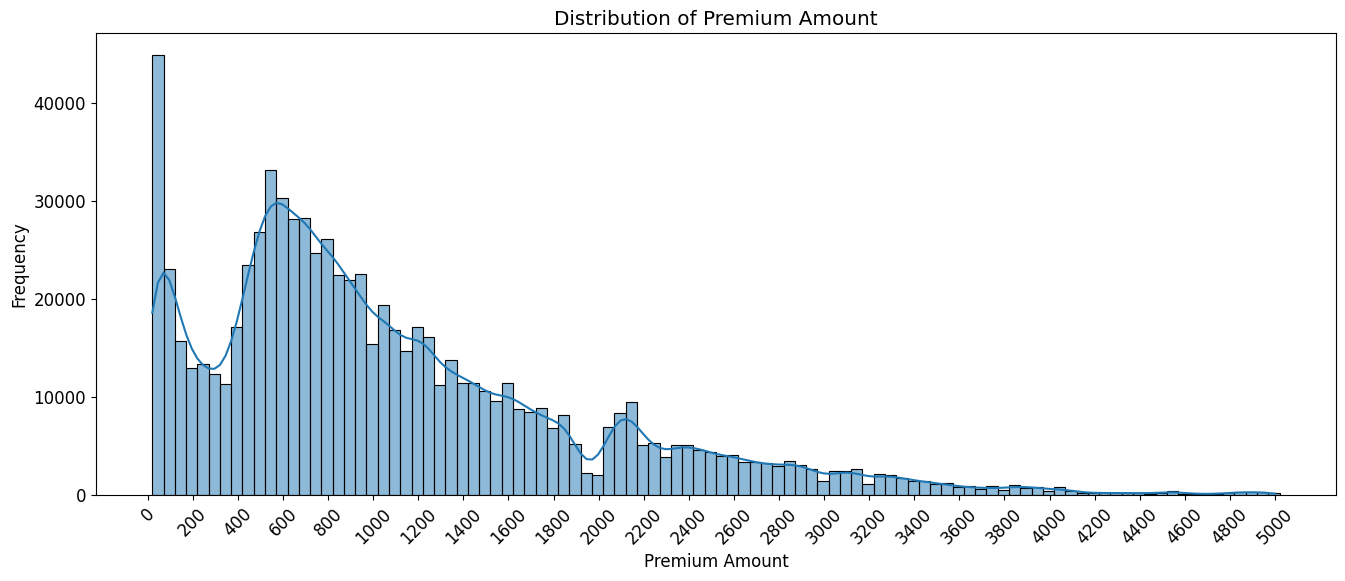

In [88]:
#plotting the distribution of the premium_amount
plt.figure(figsize=(16, 6))
sns.histplot(df_clean['premium_amount'], kde=True, bins=np.arange(20, 5050, 50))
plt.xticks(np.arange(0, 5200, 200), rotation=45)
plt.title('Distribution of Premium Amount')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.show()

#### Conclusion
- we can see that the distribution is heavily skewed to the left
- the interval with larges number of records is below 100 
- very few policy holders have a premium amount larger that 2600

#### **4.1.1** exploring `Age`
to explore the Age variable we need to print the descriptive statistics. Moreover, we need to plot the distribution of the age column. we will do this through a histogram plot

---

In [25]:
# printing the descriptive statistics of the age column
print("Descriptive statistics of the age column")
df_clean['age'].describe()

Descriptive statistics of the age column


count   790,332.000
mean         41.136
std          13.541
min          18.000
25%          30.000
50%          41.000
75%          53.000
max          64.000
Name: age, dtype: float64

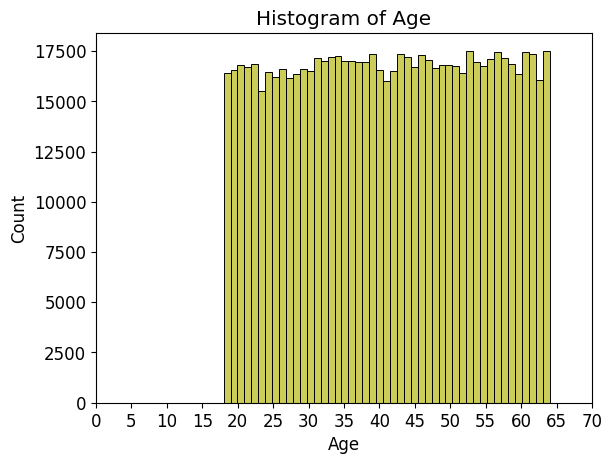

In [26]:
#plotting a histogram of the age column
sns.histplot(df_clean['age'], bins=47, color='tab:olive', edgecolor='black')
plt.xticks(np.arange(0, 75, 5))
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.show()

**Observations**
- the ages are between 18 and 64.
- the data has an even distribution across the ages.

#### **4.1.2** exploring `gender`
to explore the gender variable we need to print the count of each gender value. Moreover, we need to plot the distribution of the gender column. we will do this through a bar chart

In [27]:
# printing the count and percentage for each gender
print("value count of the gender column")
print(df_clean['gender'].value_counts())
print("\n")
print("percentage value for each gender")
df_clean['gender'].value_counts(normalize=True) * 100

value count of the gender column
gender
Male      396702
Female    393630
Name: count, dtype: int64


percentage value for each gender


gender
Male     50.194
Female   49.806
Name: proportion, dtype: float64

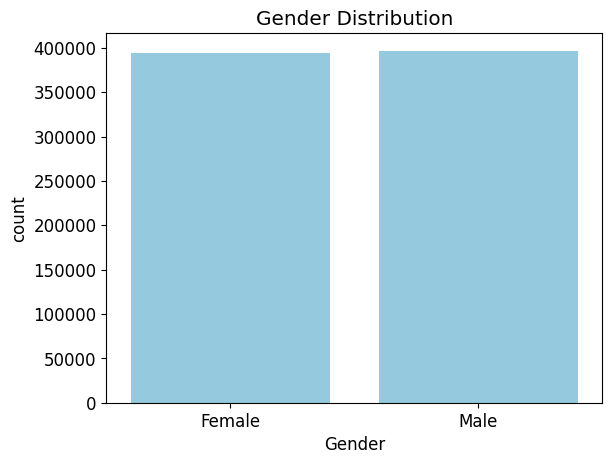

In [28]:
#plotting a bar chart of the gender column
sns.countplot(df_clean,x='gender', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.show()

**Observations**
- the data has an even distribution across genders.

#### **4.1.3** exploring `annual_income`
to explore the annual_income variable we need to print the descriptive statistics for it. Moreover, we need to plot the distribution of the annual_income column. we will do this through a kde plot

In [29]:
# printing the descriptive statistics of the annual_income column
print("Descriptive statistics of the annual_income column")
df_clean['annual_income'].describe()

Descriptive statistics of the annual_income column


count   790,332.000
mean     32,810.934
std      31,819.797
min           1.000
25%       8,791.000
50%      24,194.000
75%      44,393.000
max     149,997.000
Name: annual_income, dtype: float64

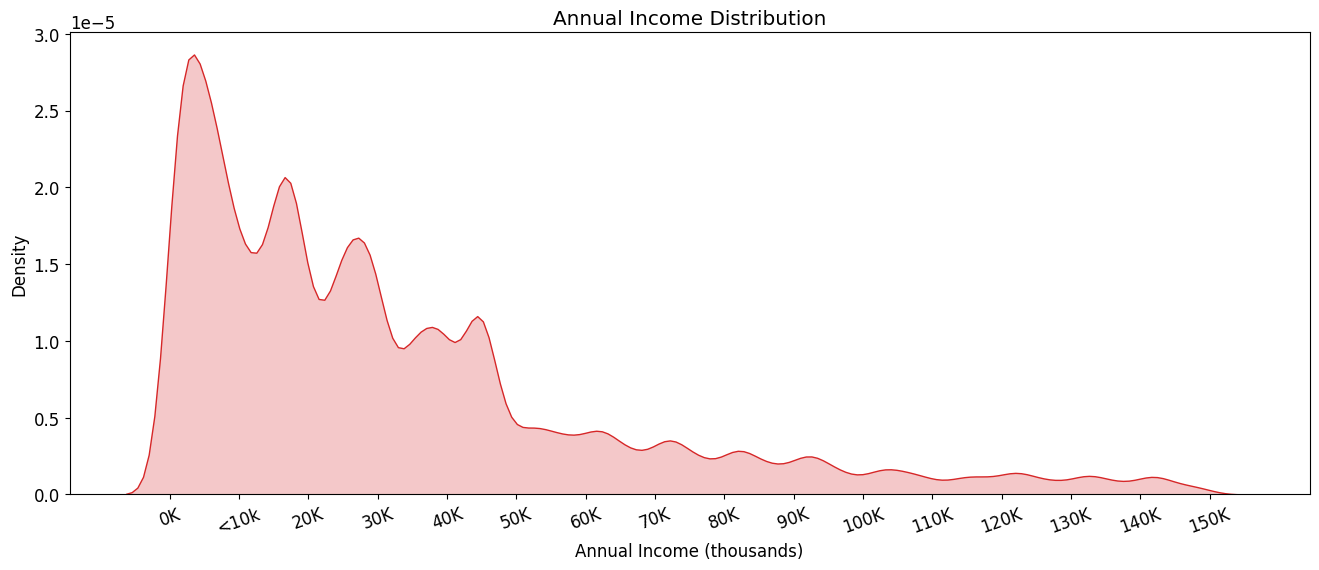

In [30]:
#plotting a bar chart of the gender column
plt.figure(figsize=(16, 6))
sns.kdeplot(df_clean['annual_income'], color='tab:red', fill=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (thousands)')
xticks = np.arange(0, 160000, 10000)
labels = [f'{int(x/1000)}K' for x in xticks]
labels[1] = '<10k'
plt.xticks(xticks, labels=labels, rotation=20)
plt.show()

**Observations**
- the data is heavily skewed to the left
- the peak point is under 10k 
- few records have annual_income above 50k

#### **4.1.4** exploring `marital_status`
to explore the marital_status variable we need to print the count of each marital_status value. Moreover, we need to plot the distribution of the marital_status column. we will do this through a bar chart

In [31]:
# printing the count and percentage for each marital status
print("value count of the marital_status column")
print(df_clean['marital_status'].value_counts())
print("\n")
print("percentage value for each marital status")
df_clean['marital_status'].value_counts(normalize=True) * 100

value count of the marital_status column
marital_status
Single      264746
Married     263401
Divorced    262185
Name: count, dtype: int64


percentage value for each marital status


marital_status
Single     33.498
Married    33.328
Divorced   33.174
Name: proportion, dtype: float64

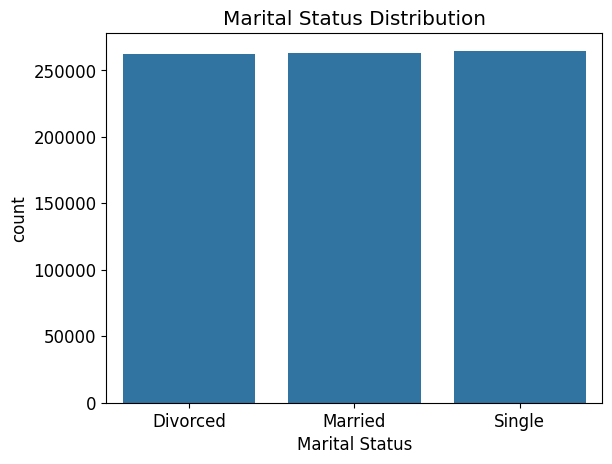

In [32]:
#plotting a bar chart of the marital status column
sns.countplot(df_clean,x='marital_status', color='tab:blue')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.show()

**Observations**
- the data has an even distribution across marital statuses.

---

### **4.1.6** Group analysis
printing the counts and statistics for the rest to see if there is something that needs farther investigation.

In [33]:
df_clean.describe()

,id,age,annual_income,number_of_dependents,health_score,previous_claims,vehicle_age,credit_score,insurance_duration,policy_start_date,premium_amount
count,"790,332.000","790,332.000","790,332.000","790,332.000","790,332.000","790,332.000","790,332.000","790,332.000","790,332.000",790332,"790,332.000"
mean,"600,049.868",41.136,"32,810.934",2.012,25.556,0.689,9.568,593.636,5.023,2022-02-12 21:33:42.995619328,"1,099.195"
min,0.000,18.000,1.000,0.000,2.012,0.000,0.000,300.000,1.000,2019-08-17 15:21:39.080371,20.000
25%,"300,275.750",30.000,"8,791.000",1.000,15.899,0.000,5.000,469.000,3.000,2020-11-20 15:21:39.155230976,515.000
50%,"600,243.000",41.000,"24,194.000",2.000,24.528,0.000,10.000,596.000,5.000,2022-02-13 15:21:39.167098880,871.000
75%,"899,674.250",53.000,"44,393.000",3.000,34.405,1.000,15.000,721.000,7.000,2023-05-05 15:21:39.206099456,"1,498.000"
max,"1,199,995.000",64.000,"149,997.000",4.000,58.976,8.000,19.000,849.000,9.000,2024-08-15 15:21:39.287115,"4,999.000"
std,"346,263.596",13.541,"31,819.797",1.416,12.163,0.933,5.776,149.667,2.595,NaN,860.546


In [34]:
def print_column_stats(df, column):
    print(f"Value count of the {column} column")
    print(df[column].value_counts())
    print("\n")
    print(f"Percentage value for each {column}")
    print(df[column].value_counts(normalize=True) * 100)

In [35]:
print_column_stats(df_clean, 'education_level')

Value count of the education_level column
education_level
PhD            200343
Bachelor's     200137
Master's       199294
High School    190558
Name: count, dtype: int64


Percentage value for each education_level
education_level
PhD           25.349
Bachelor's    25.323
Master's      25.216
High School   24.111
Name: proportion, dtype: float64


In [36]:
print_column_stats(df_clean, 'policy_type')

Value count of the policy_type column
policy_type
Premium          264469
Comprehensive    263287
Basic            262576
Name: count, dtype: int64


Percentage value for each policy_type
policy_type
Premium         33.463
Comprehensive   33.313
Basic           33.224
Name: proportion, dtype: float64


In [37]:
print_column_stats(df_clean, 'customer_feedback')

Value count of the customer_feedback column
customer_feedback
Average    266140
Poor       264196
Good       259996
Name: count, dtype: int64


Percentage value for each customer_feedback
customer_feedback
Average   33.674
Poor      33.428
Good      32.897
Name: proportion, dtype: float64


In [38]:
print_column_stats(df_clean, 'smoking_status')

Value count of the smoking_status column
smoking_status
Yes    395848
No     394484
Name: count, dtype: int64


Percentage value for each smoking_status
smoking_status
Yes   50.086
No    49.914
Name: proportion, dtype: float64


In [39]:
print_column_stats(df_clean, 'exercise_frequency')

Value count of the exercise_frequency column
exercise_frequency
Weekly     201861
Monthly    197489
Rarely     197406
Daily      193576
Name: count, dtype: int64


Percentage value for each exercise_frequency
exercise_frequency
Weekly    25.541
Monthly   24.988
Rarely    24.978
Daily     24.493
Name: proportion, dtype: float64


In [40]:
print_column_stats(df_clean, 'property_type')

Value count of the property_type column
property_type
House        263709
Apartment    263417
Condo        263206
Name: count, dtype: int64


Percentage value for each property_type
property_type
House       33.367
Apartment   33.330
Condo       33.303
Name: proportion, dtype: float64


In [41]:
print_column_stats(df_clean, 'location')

Value count of the location column
location
Suburban    264597
Rural       264137
Urban       261598
Name: count, dtype: int64


Percentage value for each location
location
Suburban   33.479
Rural      33.421
Urban      33.100
Name: proportion, dtype: float64


##### Observation: 
- All the Categorical data is evenly distributed between categories


## **4.2** Bivariate Analysis

### **4.2.1** correlation analysis
To start off the Bivariate analysis we will print the correlation matrix between the `premium_amount` and the other variables

In [43]:
#printing correlation matrix for the premium_amount column
correlation = df_clean.corr(numeric_only=True)
correlation['premium_amount'].sort_values(ascending=False)

premium_amount          1.000
previous_claims         0.042
health_score            0.014
vehicle_age             0.002
id                     -0.000
insurance_duration     -0.001
number_of_dependents   -0.001
age                    -0.003
credit_score           -0.030
annual_income          -0.031
Name: premium_amount, dtype: float64

From the Correlation analysis we see that the numerical variables don't have much correlation to premium amount

### **4.2.2** relation between `gender` and `premium_amount` 
To study the relation between the `gender` and `premium_amount` columns we will print the descriptive statistics for each gender and plot the distribution of premium type by gender, we will do this via a box plot

In [52]:
#printing the descriptive statistics of the premium_amount column by gender
df_clean.groupby('gender', observed=False).agg({'premium_amount': ['mean', 'median', 'std', 'min', 'max']})

premium_amount                                 
                 mean  median     std    min       max
gender                                                
Female      1,099.269 871.000 860.463 20.000 4,997.000
Male        1,099.122 871.000 860.631 20.000 4,999.000

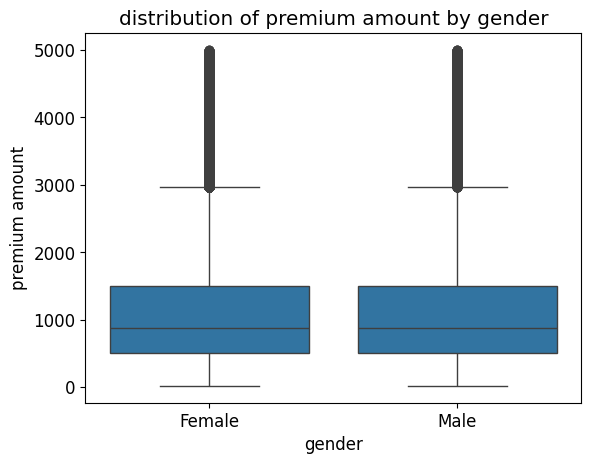

In [ ]:
#plotting a boxplot of the premium_amount by gender
sns.boxplot(data=df_clean, x='gender', y='premium_amount')
plt.title('distribution of premium amount by gender')
plt.xlabel('gender')
plt.ylabel('premium amount');
plt.show()

#### Conclusion: 
- there is no difference between male and female in insurance premium.

### **4.2.3** relation between `marital_status` and `premium_amount` 
To study the relation between the `marital_status` and `premium_amount` columns we will print the descriptive statistics for each gender and plot the distribution of premium type by gender, we will do this via a violin chart

In [ ]:
#printing the descriptive statistics of the premium_amount column by marital_status
df_clean.groupby('marital_status', observed=False).agg({'premium_amount': ['mean', 'median', 'std', 'min', 'max']})

premium_amount                                 
                         mean  median     std    min       max
marital_status                                                
Divorced            1,098.472 870.000 860.837 20.000 4,997.000
Married             1,098.565 871.000 859.074 20.000 4,996.000
Single              1,100.538 872.000 861.723 20.000 4,999.000

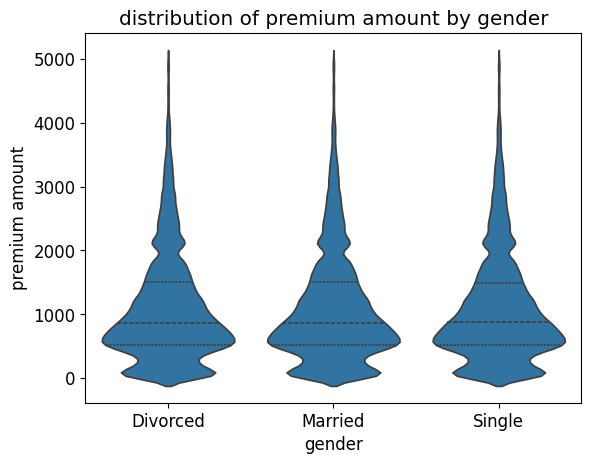

In [89]:
#plotting a boxplot of the premium_amount by marital_status
sns.violinplot(data=df_clean, x='marital_status', y='premium_amount', inner='quartile')
plt.title('distribution of premium amount by gender')
plt.xlabel('gender')
plt.ylabel('premium amount');
plt.show()

#### Conclusion: 
- there is no difference between marital statuses in insurance premium.

### **4.2.4** relation between `education_level` and `premium_amount` 
To study the relation between the `education_level` and `premium_amount` columns we will print the descriptive statistics for each gender and plot the distribution of premium type by gender, we will do this via a box plot

In [56]:
#printing the descriptive statistics of the premium_amount column by education_level
df_clean.groupby('education_level', observed=False).agg({'premium_amount': ['mean', 'median', 'std', 'min', 'max']})

premium_amount                                 
                          mean  median     std    min       max
education_level                                                
Bachelor's           1,100.187 872.000 860.945 20.000 4,988.000
High School          1,099.398 872.000 860.226 20.000 4,999.000
Master's             1,099.740 870.000 862.058 20.000 4,997.000
PhD                  1,097.468 867.000 858.950 20.000 4,991.000

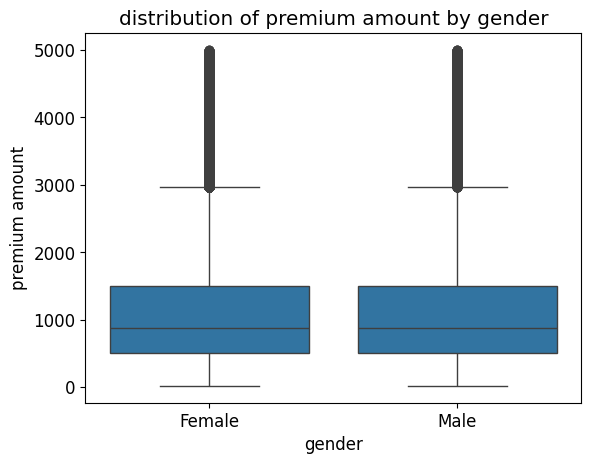

In [55]:
#plotting a boxplot of the premium_amount by education_level
sns.boxplot(data=df_clean, x='gender', y='premium_amount')
plt.title('distribution of premium amount by gender')
plt.xlabel('gender')
plt.ylabel('premium amount');
plt.show()

#### Conclusion: 
- there is no difference between education levels in premium amount.

### **4.2.5** relation between `location` and `premium_amount` 
To study the relation between the `location` and `premium_amount` columns we will print the descriptive statistics for each gender and plot the distribution of premium type by gender, we will do this via a violin chart

In [91]:
#printing the descriptive statistics of the premium_amount column by location
df_clean.groupby('location', observed=False).agg({'premium_amount': ['mean', 'median', 'std', 'min', 'max']})

premium_amount                                 
                   mean  median     std    min       max
location                                                
Rural         1,097.429 870.000 860.399 20.000 4,997.000
Suburban      1,099.163 870.000 860.999 20.000 4,988.000
Urban         1,101.011 873.000 860.237 20.000 4,999.000

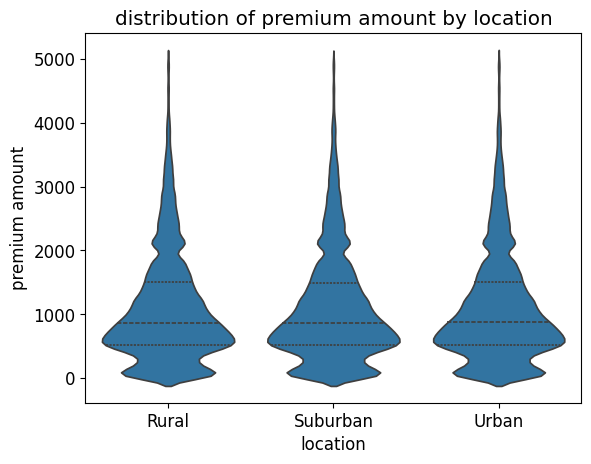

In [90]:
#plotting a boxplot of the premium_amount by location
sns.violinplot(data=df_clean, x='location', y='premium_amount', inner='quartile')
plt.title('distribution of premium amount by location')
plt.xlabel('location')
plt.ylabel('premium amount');
plt.show()

#### Conclusion: 
- there is no difference between location in insurance premium.

### **4.2.6** relation between `policy_type` and `premium_amount` 
To study the relation between the `policy_type` and `premium_amount` columns we will print the descriptive statistics for each gender and plot the distribution of premium type by gender, we will do this via a box plot

In [93]:
#printing the descriptive statistics of the premium_amount column by policy_type
df_clean.groupby('policy_type', observed=False).agg({'premium_amount': ['mean', 'median', 'std', 'min', 'max']})

premium_amount                                 
                        mean  median     std    min       max
policy_type                                                  
Basic              1,099.689 872.000 860.550 20.000 4,999.000
Comprehensive      1,099.406 872.000 859.755 20.000 4,992.000
Premium            1,098.495 867.000 861.333 20.000 4,997.000

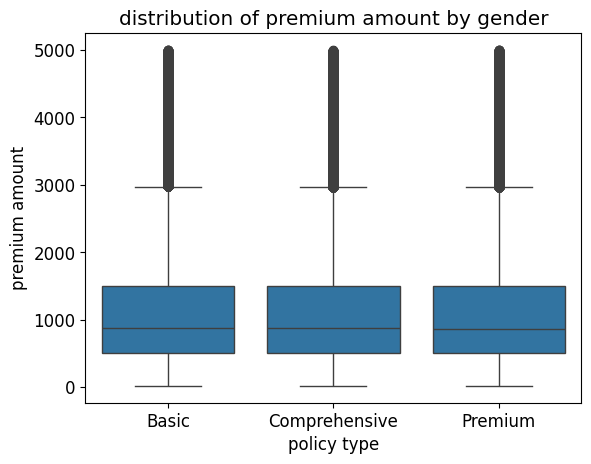

In [95]:
#plotting a boxplot of the premium_amount by education_level
sns.boxplot(data=df_clean, x='policy_type', y='premium_amount')
plt.title('distribution of premium amount by gender')
plt.xlabel('policy type')
plt.ylabel('premium amount');
plt.show()

#### Conclusion: 
- there is no difference between policy types in premium amount.

### **4.2.7** relation between `property_type` and `premium_amount` 
To study the relation between the `property_type` and `premium_amount` columns we will print the descriptive statistics for each gender and plot the distribution of premium type by gender, we will do this via a violin chart

In [98]:
#printing the descriptive statistics of the premium_amount column by property_type
df_clean.groupby('property_type', observed=False).agg({'premium_amount': ['mean', 'median', 'std', 'min', 'max']})

premium_amount                                 
                        mean  median     std    min       max
property_type                                                
Apartment          1,100.277 870.000 862.531 20.000 4,997.000
Condo              1,098.845 869.000 862.406 20.000 4,997.000
House              1,098.464 873.000 856.697 20.000 4,999.000

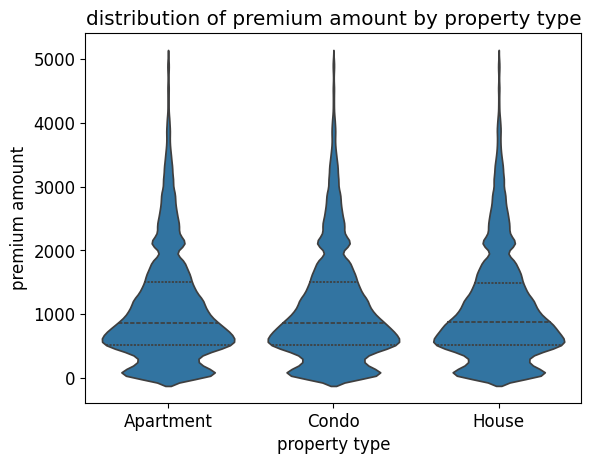

In [97]:
#plotting a boxplot of the premium_amount by property_type
sns.violinplot(data=df_clean, x='property_type', y='premium_amount', inner='quartile')
plt.title('distribution of premium amount by property type')
plt.xlabel('property type')
plt.ylabel('premium amount');
plt.show()

#### Conclusion: 
- there is no difference between property type in insurance premium.

## **4.3** Multivariate Analysis

### **4.3.1** relation between `annual_income` and `premium_amount` by `age`
in order to investigate this relation we will plot a colored scatter plot to visualize the relation

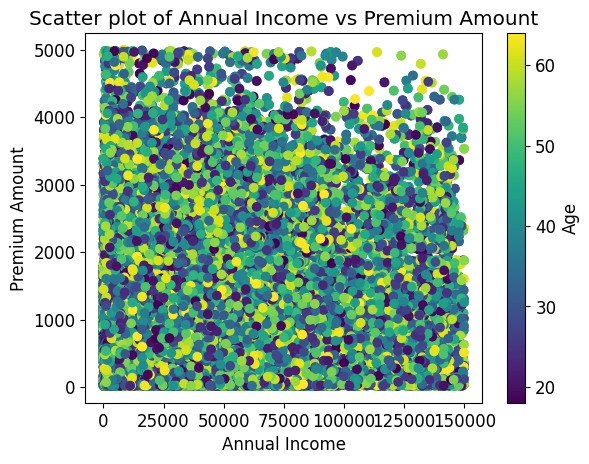

In [118]:
plt.scatter(data=df_sample, x='annual_income', y='premium_amount', c='age', cmap='viridis')
plt.title('Scatter plot of Annual Income vs Premium Amount')
plt.colorbar(label='Age')
plt.xlabel('Annual Income')
plt.ylabel('Premium Amount')
plt.show()

#### Conclusion
- there is no strong correlation between the variables

# 5

## Conclusion

### Insights 
After the analysis we found no strong relation we could rely on in the prediction, it is most likely a distribution of small weights of all the columns in the prediction

### Suggestions

the prediction process should rely on all the columns,

---

### Versioning
Notebook and insights by Momen Ghulmi.
- Version: 1.0.0
- Date: 2024-12-25